In [ ]:
import seaborn as sns
import math as math


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier



Get the 4 different protocols in their own groups and then use RF Forest Classifier on each one of them individually

In [ ]:
# DF For TLS Protocols
ltl_df = pd.read_csv('tls_linux.csv', encoding = "ISO-8859-1")
wtl_df = pd.read_csv('tls_windows.csv', encoding = "ISO-8859-1")
mtl_df = pd.read_csv('tls_macos.csv', encoding = "ISO-8859-1")

In [ ]:
ltl_df.head()

,SRC_IP,MF_FLAG,DF_FLAG,PACKET_NO,KNOWN_HOST_DEVICE,PACKET_SIZE,TIMESTAMP,TTL,DST_IP,IP_FRAG_OFF
0,172.16.16.128,0,0,1,Linux,20,1.258920e+09,128,172.16.16.255,0
1,172.16.16.128,0,0,2,Linux,20,1.258920e+09,1,239.255.255.250,0
2,172.16.16.2,0,1,3,Linux,20,1.258920e+09,64,172.16.16.128,0
3,172.16.16.128,0,1,4,Linux,20,1.258920e+09,4,224.0.1.60,0
4,172.16.16.128,0,0,6,Linux,20,1.258920e+09,1,224.0.0.252,0


In [ ]:
wtl_df.head()

,MF_FLAG,PACKET_SIZE,TLS_VERSION,PACKET_NO,DF_FLAG,KNOWN_HOST_DEVICE,SUB_PROTOCOL,TLS_EXTENSION_SIG_ALGS,TTL,IP_FRAG_OFF,TIMESTAMP,TLS_CIPHER_SUITES,SRC_IP,DST_IP
0,0,20,NaN,1,1,Windows,NaN,NaN,42,0,1.663877e+09,NaN,35.169.217.52,10.169.161.162
1,0,20,NaN,2,1,Windows,NaN,NaN,128,0,1.663877e+09,NaN,10.169.161.162,35.169.217.52
2,0,20,NaN,3,1,Windows,NaN,NaN,42,0,1.663877e+09,NaN,35.169.217.52,10.169.161.162
3,0,20,NaN,4,1,Windows,NaN,NaN,128,0,1.663878e+09,NaN,10.169.161.162,142.251.33.36
4,0,20,NaN,5,1,Windows,NaN,NaN,118,0,1.663878e+09,NaN,142.251.33.36,10.169.161.162


In [ ]:
mtl_df.head()

,DF_FLAG,PACKET_NO,TLS_VERSION,SRC_IP,TLS_CIPHER_SUITES,SUB_PROTOCOL,TLS_EXTENSION_SIG_ALGS,DST_IP,TTL,MF_FLAG,PACKET_SIZE,TIMESTAMP,IP_FRAG_OFF,KNOWN_HOST_DEVICE
0,1,1,NaN,192.168.86.21,NaN,NaN,NaN,52.96.57.34,64,0,20,1.666898e+09,0,MacOS
1,1,2,NaN,52.96.57.34,NaN,NaN,NaN,192.168.86.21,241,0,20,1.666898e+09,0,MacOS
2,0,3,NaN,192.168.86.21,NaN,NaN,NaN,140.82.112.26,64,0,20,1.666898e+09,0,MacOS
3,1,4,NaN,140.82.112.26,NaN,NaN,NaN,192.168.86.21,49,0,20,1.666898e+09,0,MacOS
4,0,5,NaN,192.168.86.23,NaN,NaN,NaN,224.0.0.251,255,0,20,1.666898e+09,0,MacOS


In [ ]:
mtl_df.dtypes

DF_FLAG                     int64
PACKET_NO                   int64
TLS_VERSION                object
SRC_IP                     object
TLS_CIPHER_SUITES          object
SUB_PROTOCOL               object
TLS_EXTENSION_SIG_ALGS     object
DST_IP                     object
TTL                         int64
MF_FLAG                     int64
PACKET_SIZE                 int64
TIMESTAMP                 float64
IP_FRAG_OFF                 int64
KNOWN_HOST_DEVICE          object
dtype: object

In [ ]:
mtl_df['TLS_CIPHER_SUITES'].isna().sum()


7774

In [ ]:
mtl_df['TLS_EXTENSION_SIG_ALGS'].isna().sum()

7774

In [ ]:
mtl_df.shape[0]

7810

In [ ]:
wtl_df.dtypes

MF_FLAG                     int64
PACKET_SIZE                 int64
TLS_VERSION                object
PACKET_NO                   int64
DF_FLAG                     int64
KNOWN_HOST_DEVICE          object
SUB_PROTOCOL               object
TLS_EXTENSION_SIG_ALGS     object
TTL                         int64
IP_FRAG_OFF                 int64
TIMESTAMP                 float64
TLS_CIPHER_SUITES          object
SRC_IP                     object
DST_IP                     object
dtype: object

In [ ]:
wtl_df.shape[0]

23713

In [ ]:
wtl_df['TLS_EXTENSION_SIG_ALGS'].isna().sum()

23589

In [ ]:
ltl_df.dtypes

SRC_IP                object
MF_FLAG                int64
DF_FLAG                int64
PACKET_NO              int64
KNOWN_HOST_DEVICE     object
PACKET_SIZE            int64
TIMESTAMP            float64
TTL                    int64
DST_IP                object
IP_FRAG_OFF            int64
dtype: object

In [ ]:
wtl_df['TLS_CIPHER_SUITES'].isna().sum()


23589

In [ ]:
#mtl_df["TLS_CIPHER_SUITES"] = mtl_df["TLS_CIPHER_SUITES"].astype('category')
#mtl_df["TLS_EXTENSION_SIG_ALGS"] = mtl_df["TLS_EXTENSION_SIG_ALGS"].astype('category')
#wtl_df["TLS_CIPHER_SUITES"] = wtl_df["TLS_CIPHER_SUITES"].astype('category')
#wtl_df["TLS_EXTENSION_SIG_ALGS"] = wtl_df["TLS_EXTENSION_SIG_ALGS"].astype('category')


In [ ]:
#mtl_df["TLS_CIPHER_SUITES"] = mtl_df["TLS_CIPHER_SUITES"].cat.codes
#mtl_df["TLS_EXTENSION_SIG_ALGS"] = mtl_df["TLS_EXTENSION_SIG_ALGS"].cat.codes
#wtl_df["TLS_CIPHER_SUITES"] = wtl_df["TLS_CIPHER_SUITES"].cat.codes
#wtl_df["TLS_EXTENSION_SIG_ALGS"] = wtl_df["TLS_EXTENSION_SIG_ALGS"].cat.codes



In [ ]:
ltl_df['OS'] = 1
mtl_df['OS'] = 2
wtl_df['OS'] = 3


In [ ]:
tls_df = pd.concat([ltl_df, mtl_df, wtl_df], axis=0)


In [ ]:
tls_df.head()

,SRC_IP,MF_FLAG,DF_FLAG,PACKET_NO,KNOWN_HOST_DEVICE,PACKET_SIZE,TIMESTAMP,TTL,DST_IP,IP_FRAG_OFF,OS,TLS_VERSION,TLS_CIPHER_SUITES,SUB_PROTOCOL,TLS_EXTENSION_SIG_ALGS
0,172.16.16.128,0,0,1,Linux,20,1.258920e+09,128,172.16.16.255,0,1,NaN,NaN,NaN,NaN
1,172.16.16.128,0,0,2,Linux,20,1.258920e+09,1,239.255.255.250,0,1,NaN,NaN,NaN,NaN
2,172.16.16.2,0,1,3,Linux,20,1.258920e+09,64,172.16.16.128,0,1,NaN,NaN,NaN,NaN
3,172.16.16.128,0,1,4,Linux,20,1.258920e+09,4,224.0.1.60,0,1,NaN,NaN,NaN,NaN
4,172.16.16.128,0,0,6,Linux,20,1.258920e+09,1,224.0.0.252,0,1,NaN,NaN,NaN,NaN


In [ ]:
tls_df["TLS_CIPHER_SUITES"] = tls_df["TLS_CIPHER_SUITES"].astype('category')
tls_df["TLS_EXTENSION_SIG_ALGS"] = tls_df["TLS_EXTENSION_SIG_ALGS"].astype('category')



In [ ]:
tls_df["TLS_CIPHER_SUITES"] = tls_df["TLS_CIPHER_SUITES"].cat.codes
tls_df["TLS_EXTENSION_SIG_ALGS"] = tls_df["TLS_EXTENSION_SIG_ALGS"].cat.codes

In [ ]:
tls_df.dtypes

SRC_IP                     object
MF_FLAG                     int64
DF_FLAG                     int64
PACKET_NO                   int64
KNOWN_HOST_DEVICE          object
PACKET_SIZE                 int64
TIMESTAMP                 float64
TTL                         int64
DST_IP                     object
IP_FRAG_OFF                 int64
OS                          int64
TLS_VERSION                object
TLS_CIPHER_SUITES            int8
SUB_PROTOCOL               object
TLS_EXTENSION_SIG_ALGS       int8
dtype: object

In [ ]:
tls_df.head()

,SRC_IP,MF_FLAG,DF_FLAG,PACKET_NO,KNOWN_HOST_DEVICE,PACKET_SIZE,TIMESTAMP,TTL,DST_IP,IP_FRAG_OFF,OS,TLS_VERSION,TLS_CIPHER_SUITES,SUB_PROTOCOL,TLS_EXTENSION_SIG_ALGS
0,172.16.16.128,0,0,1,Linux,20,1.258920e+09,128,172.16.16.255,0,1,NaN,-1,NaN,-1
1,172.16.16.128,0,0,2,Linux,20,1.258920e+09,1,239.255.255.250,0,1,NaN,-1,NaN,-1
2,172.16.16.2,0,1,3,Linux,20,1.258920e+09,64,172.16.16.128,0,1,NaN,-1,NaN,-1
3,172.16.16.128,0,1,4,Linux,20,1.258920e+09,4,224.0.1.60,0,1,NaN,-1,NaN,-1
4,172.16.16.128,0,0,6,Linux,20,1.258920e+09,1,224.0.0.252,0,1,NaN,-1,NaN,-1


In [ ]:
# Dropping TLS Columns
tls_df.drop(['TIMESTAMP', 'DST_IP', 'KNOWN_HOST_DEVICE', 'TLS_VERSION', 'SUB_PROTOCOL'], axis=1, inplace=True)

In [ ]:
tls_df.head()

,SRC_IP,MF_FLAG,DF_FLAG,PACKET_NO,PACKET_SIZE,TTL,IP_FRAG_OFF,OS,TLS_CIPHER_SUITES,TLS_EXTENSION_SIG_ALGS
0,172.16.16.128,0,0,1,20,128,0,1,-1,-1
1,172.16.16.128,0,0,2,20,1,0,1,-1,-1
2,172.16.16.2,0,1,3,20,64,0,1,-1,-1
3,172.16.16.128,0,1,4,20,4,0,1,-1,-1
4,172.16.16.128,0,0,6,20,1,0,1,-1,-1


In [ ]:
tls_df.shape[0]

44384

In [ ]:
corr = tls_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,MF_FLAG,DF_FLAG,PACKET_NO,PACKET_SIZE,TTL,IP_FRAG_OFF,OS,TLS_CIPHER_SUITES,TLS_EXTENSION_SIG_ALGS
MF_FLAG,nan,nan,nan,nan,nan,nan,nan,nan,nan
DF_FLAG,nan,1.000000,0.135220,-0.011652,0.074381,nan,0.154343,0.030904,0.034654
PACKET_NO,nan,0.135220,1.000000,0.016232,-0.124478,nan,-0.306816,-0.019565,-0.020344
PACKET_SIZE,nan,-0.011652,0.016232,1.000000,-0.011225,nan,-0.009556,-0.000360,-0.000404
TTL,nan,0.074381,-0.124478,-0.011225,1.000000,nan,0.407919,0.003214,0.002549
IP_FRAG_OFF,nan,nan,nan,nan,nan,nan,nan,nan,nan
OS,nan,0.154343,-0.306816,-0.009556,0.407919,nan,1.000000,0.033655,0.036500
TLS_CIPHER_SUITES,nan,0.030904,-0.019565,-0.000360,0.003214,nan,0.033655,1.000000,0.891780
TLS_EXTENSION_SIG_ALGS,nan,0.034654,-0.020344,-0.000404,0.002549,nan,0.036500,0.891780,1.000000


In [ ]:
tls_df.head()

,SRC_IP,MF_FLAG,DF_FLAG,PACKET_NO,PACKET_SIZE,TTL,IP_FRAG_OFF,OS,TLS_CIPHER_SUITES,TLS_EXTENSION_SIG_ALGS
0,172.16.16.128,0,0,1,20,128,0,1,-1,-1
1,172.16.16.128,0,0,2,20,1,0,1,-1,-1
2,172.16.16.2,0,1,3,20,64,0,1,-1,-1
3,172.16.16.128,0,1,4,20,4,0,1,-1,-1
4,172.16.16.128,0,0,6,20,1,0,1,-1,-1


In [ ]:
tls_df.drop([ 'SRC_IP'], axis=1, inplace=True)

In [ ]:
# Features to Select: TTL, DF_FLAG, SRC_IP, PACKET_NO, TIMESTAMP, DST_IP
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
df_extracted = tls_df[['TTL', 'DF_FLAG', 'PACKET_NO', 'TLS_CIPHER_SUITES', 'TLS_EXTENSION_SIG_ALGS']]
df_label = tls_df['OS']

In [ ]:

tft = LabelEncoder()
df_label_t = tft.fit_transform(df_label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_extracted, df_label_t, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
rf_pipe = Pipeline

In [ ]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
import graphviz
from sklearn import tree

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


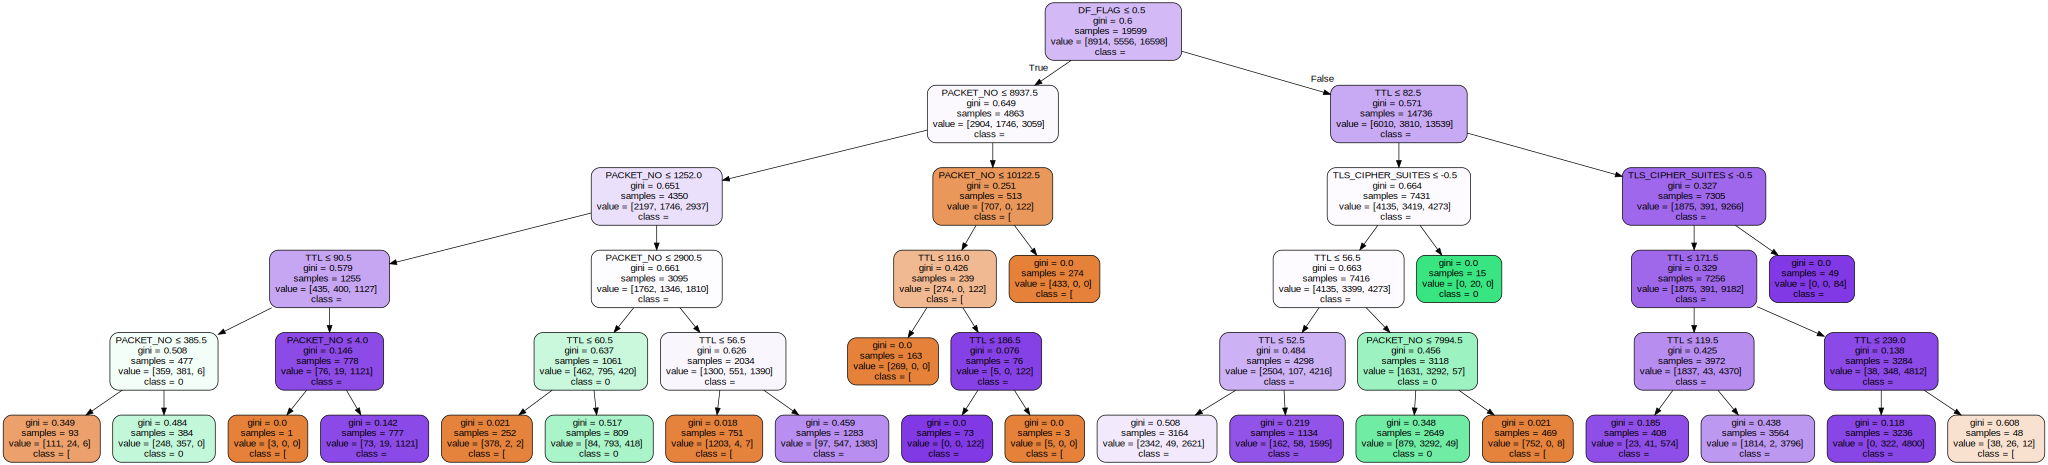

In [ ]:
dot_data = tree.export_graphviz(rf.estimators_[0], out_file=None, feature_names = df_extracted.columns, class_names = str(df_label_t),
                                filled = True, rounded = True, special_characters = True, impurity = True)

graph = graphviz.Source(dot_data, format = 'png')
graph

In [ ]:
y_pred = rf.predict(X_test)

base_value = (classification_report(y_test, y_pred))
print(base_value)

              precision    recall  f1-score   support

           0       0.98      0.59      0.74      3902
           1       0.82      0.89      0.85      2314
           2       0.83      0.99      0.91      7100

    accuracy                           0.86     13316
   macro avg       0.88      0.82      0.83     13316
weighted avg       0.88      0.86      0.85     13316



In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


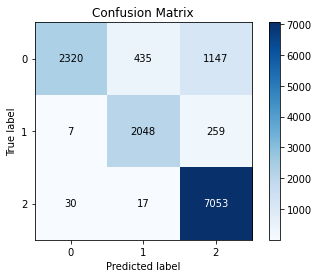

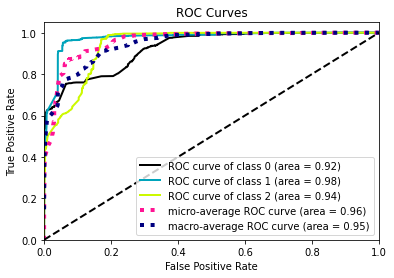

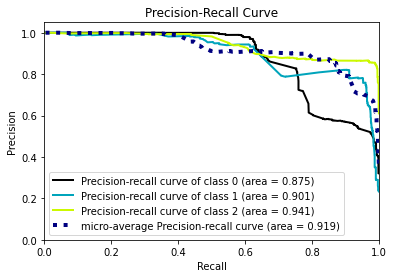

In [ ]:
y_probs = rf.predict_proba(X_test)
# Printing out the confusion Matrix and Stuff
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm.notebook import tqdm_notebook

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
clf = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(clf, param_grid, cv=2, verbose=1, n_jobs = 10)

grid_search.fit(X_train, y_train)
  
# Fit the grid search to the data

# Print the best hyperparameters found
print(grid_search.best_params_)


Fitting 2 folds for each of 225 candidates, totalling 450 fits


KeyboardInterrupt: ignored

In [ ]:
rf_optim = RandomForestClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
rf_optim.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      3902
           1       0.95      0.93      0.94      2314
           2       0.91      0.98      0.94      7100

    accuracy                           0.92     13316
   macro avg       0.93      0.90      0.91     13316
weighted avg       0.92      0.92      0.92     13316



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


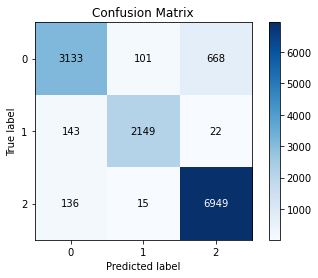

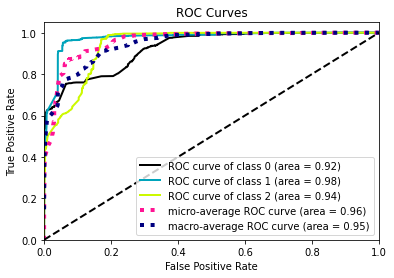

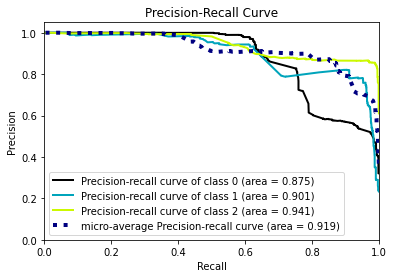

In [ ]:
y_pred = rf_optim.predict(X_test)

base_value = (classification_report(y_test, y_pred))
print(base_value)

y_probs = rf.predict_proba(X_test)
# Printing out the confusion Matrix and Stuff
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

In [ ]:
misclassified = np.where(y_test != y_pred)


In [ ]:
print(misclassified)

(array([   15,    21,    26, ..., 13277, 13279, 13312]),)


In [ ]:
ten_mis = []
for i in range(10):
  ten_mis.append(misclassified[0][i])

print(ten_mis)

[15, 21, 26, 41, 49, 53, 55, 66, 69, 94]


In [ ]:
X_test

,TTL,DF_FLAG,PACKET_NO,TLS_CIPHER_SUITES,TLS_EXTENSION_SIG_ALGS
22927,128,1,6332,-1,-1
11093,64,1,11126,-1,-1
10600,128,1,10633,-1,-1
11294,56,0,11327,-1,-1
8913,128,1,8946,-1,-1
...,...,...,...,...,...
22170,56,1,5562,-1,-1
7512,128,1,7513,-1,-1
5697,128,1,5698,-1,-1
19908,128,1,3292,-1,-1


In [ ]:
import pickle

# Save the model to a file
with open('tls_model.pkl', 'wb') as file:
    pickle.dump(rf_optim, file)


In [ ]:
import pickle

# Load the saved model from the file
with open('tls_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Use the loaded model to make predictions on new data
#predictions = model.predict(new_data)


In [ ]:
# To-Do:  Create models for the other 3 protocols but TLS is done